In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [5]:
# import dependencies
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot
import seaborn as sns
from tabulate import tabulate
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math


In [6]:
#read the original csv
df_ArSt = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
df_ArSt.head(20)

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,6
6,2021,Jan-Mar,1035445,6053833.0,330778,Black,M,Aged 25 to 34 years,Not a youth,52,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,7
7,2021,Jan-Mar,1050464,6063477.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,8
8,2021,Jan-Mar,1045486,6053929.0,330778,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,9
9,2021,Apr-June,1012287,6004570.0,330778,Black,M,Aged 25 to 34 years,Not a youth,14,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10


### Data Cleaning

In [7]:
# check headers
df_ArSt.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

In [8]:
# Check the number of rows and columns
print(df_ArSt.shape)

(65276, 25)


In [9]:
# Check the data types
print(df_ArSt.dtypes)

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [10]:
# Check missing values
print(df_ArSt.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [11]:
# Remove Null in Perceived_Race and ArrestID
df_ArSt = df_ArSt.dropna(subset = ['Perceived_Race'])
print(df_ArSt.isnull().sum())

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             468
PersonID                               0
Perceived_Race                         0
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57472
SearchReason_AssistEscape          57472
SearchReason_PossessWeapons        57472
SearchReason_PossessEvidence       57472
ItemsFound                         57472
ObjectId        

In [12]:
#Keep the cloumns related to research and remove the others
df_ArSt_rs = df_ArSt[['Arrest_Year', 'Arrest_Month', 'PersonID','Sex','Actions_at_arrest___Assaulted_o', 'Perceived_Race','StripSearch']]
df_ArSt_rs

,Arrest_Year,Arrest_Month,PersonID,Sex,Actions_at_arrest___Assaulted_o,Perceived_Race,StripSearch
0,2020,July-Sept,326622,M,0,White,0
1,2020,July-Sept,326622,M,0,White,0
2,2020,Oct-Dec,326622,M,0,Unknown or Legacy,0
3,2021,Jan-Mar,327535,M,0,Black,0
4,2021,Jan-Mar,327535,M,0,South Asian,0
...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,316123,F,0,Indigenous,0
65272,2021,Oct-Dec,307736,M,0,South Asian,0
65273,2021,Oct-Dec,324057,F,0,White,0
65274,2021,Oct-Dec,331870,M,0,Unknown or Legacy,0


In [13]:
# Count the number of each value in Perceived_Race column
df_ArSt_rs['Perceived_Race'].value_counts()

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

In [14]:
# Count the number of each value in Strip Search column
df_ArSt_rs['StripSearch'].value_counts()

0    57472
1     7800
Name: StripSearch, dtype: int64

In [15]:
#Remove the unknown race groups since the number is small which won't impact the analysis result
df_ArSt_rs = df_ArSt_rs.loc[df_ArSt_rs["Perceived_Race"] != "Unknown or Legacy"]

In [16]:
#Merge the Asian groups
df_ArSt_rs['Perceived_Race'] = df_ArSt_rs['Perceived_Race'].replace({'South Asian': 'Asian'})
df_ArSt_rs['Perceived_Race'] = df_ArSt_rs['Perceived_Race'].replace({'East/Southeast Asian': 'Asian'})

C:\Users\maxch\AppData\Local\Temp/ipykernel_29772/3515643916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ArSt_rs['Perceived_Race'] = df_ArSt_rs['Perceived_Race'].replace({'South Asian': 'Asian'})
C:\Users\maxch\AppData\Local\Temp/ipykernel_29772/3515643916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ArSt_rs['Perceived_Race'] = df_ArSt_rs['Perceived_Race'].replace({'East/Southeast Asian': 'Asian'})


In [17]:
#Merge the Indigenous groups
df_ArSt_rs['Perceived_Race'] = df_ArSt_rs['Perceived_Race'].replace({'Latino': 'Indigenous'})
df_ArSt_rs.head()

C:\Users\maxch\AppData\Local\Temp/ipykernel_29772/2728239548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ArSt_rs['Perceived_Race'] = df_ArSt_rs['Perceived_Race'].replace({'Latino': 'Indigenous'})


,Arrest_Year,Arrest_Month,PersonID,Sex,Actions_at_arrest___Assaulted_o,Perceived_Race,StripSearch
0,2020,July-Sept,326622,M,0,White,0
1,2020,July-Sept,326622,M,0,White,0
3,2021,Jan-Mar,327535,M,0,Black,0
4,2021,Jan-Mar,327535,M,0,Asian,0
5,2021,Apr-June,327535,M,0,Asian,0


In [18]:
#Sum strip search instances for each arrestid
ss = df_ArSt_rs.groupby(['Arrest_Year', 'Arrest_Month', 'PersonID', 'Perceived_Race', 'Sex'])['StripSearch'].sum().reset_index()
ss = ss.sort_values(by=['StripSearch'], ascending=False)
ss.head(20)

,Arrest_Year,Arrest_Month,PersonID,Perceived_Race,Sex,StripSearch
4652,2020,Apr-June,333666,White,M,8
7141,2020,Jan-Mar,310131,White,M,7
11673,2020,Jan-Mar,334680,White,M,6
881,2020,Apr-June,306494,White,F,6
7197,2020,Jan-Mar,310375,Indigenous,M,6
2797,2020,Apr-June,320543,Black,M,6
18279,2020,July-Sept,336154,White,F,6
11512,2020,Jan-Mar,333849,Black,F,5
2128,2020,Apr-June,315524,White,M,5
2513,2020,Apr-June,318395,Black,F,5


In [19]:
#Sum assaulted police instances for each arrestid
#Sum strip search instances for each arrestid
aa = df_ArSt_rs.groupby(['Arrest_Year', 'Arrest_Month', 'PersonID', 'Perceived_Race', 'Sex'])['Actions_at_arrest___Assaulted_o'].sum().reset_index()
aa = aa.sort_values(by=['Actions_at_arrest___Assaulted_o'], ascending=False)
aa.head(20)

,Arrest_Year,Arrest_Month,PersonID,Perceived_Race,Sex,Actions_at_arrest___Assaulted_o
33252,2021,Jan-Mar,317918,White,M,3
48074,2021,Oct-Dec,330752,Indigenous,F,2
45627,2021,Oct-Dec,316621,Black,F,2
41429,2021,July-Sept,329763,Black,M,2
1735,2020,Apr-June,312606,White,M,2
22452,2020,Oct-Dec,326784,Asian,M,2
3248,2020,Apr-June,323471,Black,M,2
18844,2020,Oct-Dec,302446,Black,M,2
26903,2021,Apr-June,316947,White,F,2
3003,2020,Apr-June,321786,White,F,2


In [20]:
# merge DataFrames
sa = pd.merge(ss, aa, on=['Arrest_Year', 'Arrest_Month', 'PersonID', 'Perceived_Race', 'Sex'])
sa.head(20)

,Arrest_Year,Arrest_Month,PersonID,Perceived_Race,Sex,StripSearch,Actions_at_arrest___Assaulted_o
0,2020,Apr-June,333666,White,M,8,0
1,2020,Jan-Mar,310131,White,M,7,1
2,2020,Jan-Mar,334680,White,M,6,0
3,2020,Apr-June,306494,White,F,6,0
4,2020,Jan-Mar,310375,Indigenous,M,6,0
5,2020,Apr-June,320543,Black,M,6,0
6,2020,July-Sept,336154,White,F,6,0
7,2020,Jan-Mar,333849,Black,F,5,0
8,2020,Apr-June,315524,White,M,5,0
9,2020,Apr-June,318395,Black,F,5,0


In [21]:
# Recheck the count number of each value in Perceived_Race column
sa['Perceived_Race'].value_counts()

White             21898
Black             14347
Asian              7174
Indigenous         2961
Middle-Eastern     2840
Name: Perceived_Race, dtype: int64

Prepare data for RQ2

In [22]:
df = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [23]:
# combining two columns that both represent under 17
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace({'Aged 17 years and under': 'Aged 17 years and younger'})

In [24]:
df.dropna(subset=['Age_group__at_arrest_'], inplace=True)

In [25]:
# merge columns and sum cooperative instances
coop = df.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])['Actions_at_arrest___Cooperative'].sum().reset_index()

# count number of instances for each merged row
Arrests = df.groupby(['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])['Actions_at_arrest___Cooperative'].count().reset_index()
Arrests.rename(columns={'Actions_at_arrest___Cooperative': 'Arrests'}, inplace=True)

# merge counts with coop DataFrame
coop = pd.merge(coop, Arrests, on=['Arrest_Year', 'Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_'])

coop.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Actions_at_arrest___Cooperative,Arrests
0,2020,Apr-June,Black,F,Aged 17 years and younger,16,36
1,2020,Apr-June,Black,F,Aged 18 to 24 years,30,87
2,2020,Apr-June,Black,F,Aged 25 to 34 years,23,99
3,2020,Apr-June,Black,F,Aged 35 to 44 years,22,52
4,2020,Apr-June,Black,F,Aged 45 to 54 years,6,26


In [26]:
#Remove unknowns from out dataset 
coop = coop.drop(coop[coop['Perceived_Race'] == 'Unknown or Legacy'].index)

In [27]:
'''
We calculate the cooperative scores for each race group by dividing the number of cooperative instances by
the total number of arrests for each group, and named the new column 'portion'
'''

coop['portion'] = round(coop['Actions_at_arrest___Cooperative']/coop['Arrests'],2)
coop.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Actions_at_arrest___Cooperative,Arrests,portion
0,2020,Apr-June,Black,F,Aged 17 years and younger,16,36,0.44
1,2020,Apr-June,Black,F,Aged 18 to 24 years,30,87,0.34
2,2020,Apr-June,Black,F,Aged 25 to 34 years,23,99,0.23
3,2020,Apr-June,Black,F,Aged 35 to 44 years,22,52,0.42
4,2020,Apr-June,Black,F,Aged 45 to 54 years,6,26,0.23


### EDA

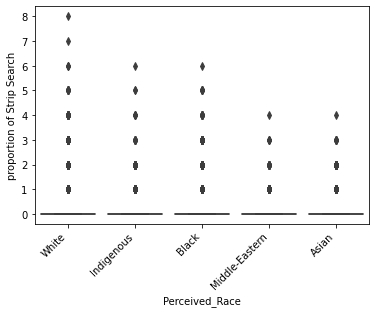

In [28]:
#Visualise overall pattern between Race groups and strip search 
sns.boxplot(x='Perceived_Race', y='StripSearch', data=ss)
race = ss['Perceived_Race'].unique().tolist()
plt.ylabel('proportion of Strip Search')
plt.xticks(rotation=45)
plt.xticks(range(len(race)), race, ha='right', va='top')
plt.show()

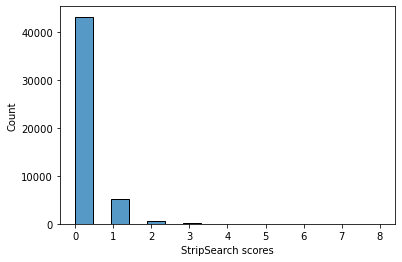

In [29]:
# Check the distribution of variables
sns.histplot(ss['StripSearch'], kde=False)
plt.ylabel('Count')
plt.xlabel('StripSearch scores')
plt.show()

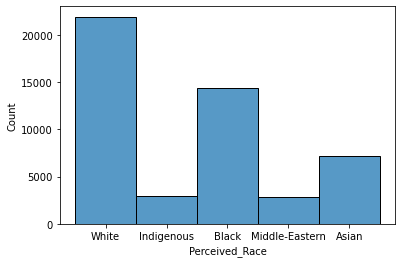

In [30]:
# Check the historistic plot of variables
sns.histplot(ss['Perceived_Race'], kde=False)
plt.ylabel('Count')
plt.xlabel('Perceived_Race')
plt.show()

In [31]:
#Calculate summary statistics
sustr = ss.groupby('Perceived_Race')['StripSearch'].describe()
print(sustr)

                  count      mean       std  min  25%  50%  75%  max
Perceived_Race                                                      
Asian            7174.0  0.083357  0.310186  0.0  0.0  0.0  0.0  4.0
Black           14347.0  0.169652  0.466280  0.0  0.0  0.0  0.0  6.0
Indigenous       2961.0  0.147923  0.461786  0.0  0.0  0.0  0.0  6.0
Middle-Eastern   2840.0  0.080282  0.316114  0.0  0.0  0.0  0.0  4.0
White           21898.0  0.162846  0.470886  0.0  0.0  0.0  0.0  8.0


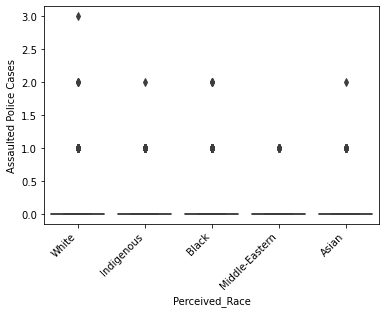

In [32]:
#Visualise overall pattern between Race groups and strip search 
sns.boxplot(x='Perceived_Race', y='Actions_at_arrest___Assaulted_o', data=sa)
race = sa['Perceived_Race'].unique().tolist()
plt.ylabel('Assaulted Police Cases')
plt.xticks(rotation=45)
plt.xticks(range(len(race)), race, ha='right', va='top')
plt.show()

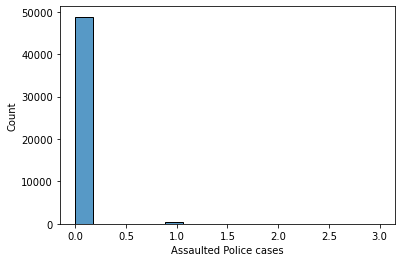

In [33]:
# Check the distribution of variables
sns.histplot(sa['Actions_at_arrest___Assaulted_o'], kde=False)
plt.ylabel('Count')
plt.xlabel('Assaulted Police cases')
plt.show()

In [34]:
#Calculate summary statistics
susa = sa.groupby('Perceived_Race')['Actions_at_arrest___Assaulted_o'].describe()
print(susa)

                  count      mean       std  min  25%  50%  75%  max
Perceived_Race                                                      
Asian            7174.0  0.003345  0.060112  0.0  0.0  0.0  0.0  2.0
Black           14347.0  0.009967  0.102109  0.0  0.0  0.0  0.0  2.0
Indigenous       2961.0  0.011820  0.111177  0.0  0.0  0.0  0.0  2.0
Middle-Eastern   2840.0  0.005634  0.074860  0.0  0.0  0.0  0.0  1.0
White           21898.0  0.007809  0.091584  0.0  0.0  0.0  0.0  3.0


### T-Test for Assumption Check

In [35]:
# Separate the strip search scores by selected race group
black = sa.loc[sa['Perceived_Race'] == 'Black', 'StripSearch']
indigenous = sa.loc[sa['Perceived_Race'] == 'Indigenous', 'StripSearch']
white = sa.loc[sa['Perceived_Race'] == 'White', 'StripSearch']
asian = sa.loc[sa['Perceived_Race'] == 'Asian', 'StripSearch']
middle_eastern = sa.loc[sa['Perceived_Race'] == 'Middle-Eastern', 'StripSearch']

In [36]:
#Perform T-Test
t_stat, p_val = ttest_ind(black, indigenous, equal_var=False)
print("Welch's t-test for Black vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, indigenous, equal_var=False)
print("Welch's t-test for White vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(asian, indigenous, equal_var=False)
print("Welch's t-test for Asian vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(middle_eastern, indigenous, equal_var=False)
print("Welch's t-test for Middle-Eastern vs Indigenous")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, asian, equal_var=False)
print("Welch's t-test for White vs Asian:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, asian, equal_var=False)
print("Welch's t-test for Black vs Asian:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(middle_eastern, asian, equal_var=False)
print("Welch's t-test for Middle-Eastern vs Asian:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, white, equal_var=False)
print("Welch's t-test for Black vs White:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(middle_eastern, white, equal_var=False)
print("Welch's t-test for Middle-Eastern vs White:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, middle_eastern, equal_var=False)
print("Welch's t-test for Black vs Middle-Eastern:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

Welch's t-test for Black vs Indigenous:
t-statistic: 2.327
p-value: 0.020
Welch's t-test for White vs Indigenous:
t-statistic: 1.647
p-value: 0.100
Welch's t-test for Asian vs Indigenous:
t-statistic: -6.986
p-value: 0.000
Welch's t-test for Middle-Eastern vs Indigenous
t-statistic: -6.533
p-value: 0.000
Welch's t-test for White vs Asian:
t-statistic: 16.384
p-value: 0.000
Welch's t-test for Black vs Asian:
t-statistic: 16.146
p-value: 0.000
Welch's t-test for Middle-Eastern vs Asian:
t-statistic: -0.441
p-value: 0.659
Welch's t-test for Black vs White:
t-statistic: 1.354
p-value: 0.176
Welch's t-test for Middle-Eastern vs White:
t-statistic: -12.266
p-value: 0.000
Welch's t-test for Black vs Middle-Eastern:
t-statistic: 12.596
p-value: 0.000


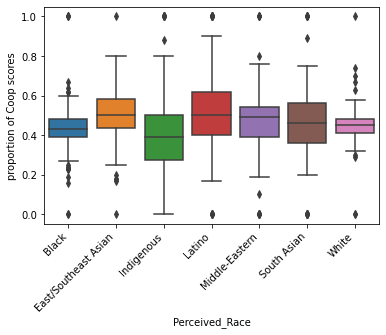

In [37]:
#Visualise overall pattern between Race groups and cooperativeness 
sns.boxplot(x='Perceived_Race', y='portion', data=coop)
race = coop['Perceived_Race'].unique().tolist()
plt.ylabel('proportion of Coop scores')
plt.xticks(rotation=45)
plt.xticks(range(len(race)), race, ha='right', va='top')
plt.show()

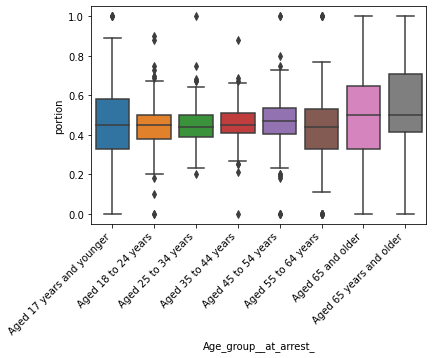

In [38]:
#Visualise overall pattern between Age groups and cooperativeness 
sns.boxplot(x='Age_group__at_arrest_', y='portion', data=coop)
age = coop['Age_group__at_arrest_'].unique().tolist()
plt.xticks(rotation=45)
plt.xticks(range(len(age)), age, ha='right', va='top')
plt.show()

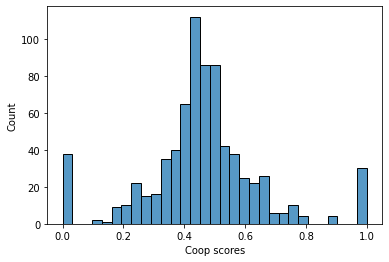

In [39]:
# Check the distribution of variables
sns.histplot(coop['portion'], kde=False)
plt.ylabel('Count')
plt.xlabel('Coop scores')
plt.show()

In [40]:
#Calculate summary statistics
summary = coop.groupby('Perceived_Race')['portion'].describe()
print(summary)

                      count      mean       std  min     25%   50%     75%  \
Perceived_Race                                                               
Black                 110.0  0.433818  0.141376  0.0  0.3900  0.43  0.4800   
East/Southeast Asian  112.0  0.504196  0.142662  0.0  0.4375  0.50  0.5825   
Indigenous             98.0  0.411939  0.248163  0.0  0.2750  0.39  0.5000   
Latino                101.0  0.505545  0.242052  0.0  0.4000  0.50  0.6200   
Middle-Eastern        107.0  0.464766  0.195855  0.0  0.3900  0.49  0.5400   
South Asian           106.0  0.457453  0.218122  0.0  0.3600  0.46  0.5600   
White                 116.0  0.448621  0.105393  0.0  0.4100  0.45  0.4800   

                      max  
Perceived_Race             
Black                 1.0  
East/Southeast Asian  1.0  
Indigenous            1.0  
Latino                1.0  
Middle-Eastern        1.0  
South Asian           1.0  
White                 1.0  


In [41]:
#Making a table for the result
table = PrettyTable()

# Define the column names
table.field_names = ["Perceived_Race", "count", "mean", "std", "min", "25%", "50%", "75%"]

# Add the data rows to the table
table.add_row(["Black", 110, 0.433818, 0.141376, 0.0, 0.3900, 0.43, 0.4800])
table.add_row(["East/Southeast Asian", 112, 0.504196, 0.142662, 0.0, 0.4375, 0.50, 0.5825])
table.add_row(["Indigenous", 98, 0.411939, 0.248163, 0.0, 0.2750, 0.39, 0.5000])
table.add_row(["Latino", 101, 0.505545, 0.242052, 0.0, 0.4000, 0.50, 0.6200])
table.add_row(["Middle-Eastern", 107, 0.464766, 0.195855, 0.0, 0.3900, 0.49, 0.5400])
table.add_row(["South Asian", 106, 0.457453, 0.218122, 0.0, 0.3600, 0.46, 0.5600])
table.add_row(["White", 116, 0.448621, 0.105393, 0.0, 0.4100, 0.45, 0.4800])

# Set the alignment of numeric columns
for field in table.field_names[1:]:
    table.align[field] = "right"

# Print the table
print(table)



+----------------------+-------+----------+----------+-----+--------+------+--------+
|    Perceived_Race    | count |   mean   |   std    | min |  25%   | 50%  |  75%   |
+----------------------+-------+----------+----------+-----+--------+------+--------+
|        Black         |  110  | 0.433818 | 0.141376 | 0.0 |  0.39  | 0.43 |  0.48  |
| East/Southeast Asian |  112  | 0.504196 | 0.142662 | 0.0 | 0.4375 | 0.5  | 0.5825 |
|      Indigenous      |   98  | 0.411939 | 0.248163 | 0.0 | 0.275  | 0.39 |  0.5   |
|        Latino        |  101  | 0.505545 | 0.242052 | 0.0 |  0.4   | 0.5  |  0.62  |
|    Middle-Eastern    |  107  | 0.464766 | 0.195855 | 0.0 |  0.39  | 0.49 |  0.54  |
|     South Asian      |  106  | 0.457453 | 0.218122 | 0.0 |  0.36  | 0.46 |  0.56  |
|        White         |  116  | 0.448621 | 0.105393 | 0.0 |  0.41  | 0.45 |  0.48  |
+----------------------+-------+----------+----------+-----+--------+------+--------+


In [42]:
# separate the cooperative scores by selected race group
black = coop.loc[coop['Perceived_Race'] == 'Black', 'portion']
latino = coop.loc[coop['Perceived_Race'] == 'Latino', 'portion']
indigenous = coop.loc[coop['Perceived_Race'] == 'Indigenous', 'portion']
white = coop.loc[coop['Perceived_Race'] == 'White', 'portion']

# perform t-test for each pair of race groups
t_stat, p_val = ttest_ind(latino, indigenous, equal_var=False)
print("Welch's t-test for Latino vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, indigenous, equal_var=False)
print("Welch's t-test for Black vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, indigenous, equal_var=False)
print("Welch's t-test for White vs Indigenous:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(white, latino, equal_var=False)
print("Welch's t-test for White vs latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))

t_stat, p_val = ttest_ind(black, latino, equal_var=False)
print("Welch's t-test for black vs latino:")
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_val))


Welch's t-test for Latino vs Indigenous:
t-statistic: 2.693
p-value: 0.008
Welch's t-test for Black vs Indigenous:
t-statistic: 0.769
p-value: 0.443
Welch's t-test for White vs Indigenous:
t-statistic: 1.363
p-value: 0.175
Welch's t-test for White vs latino:
t-statistic: -2.190
p-value: 0.030
Welch's t-test for black vs latino:
t-statistic: -2.599
p-value: 0.010


### Power Analysis

In [43]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
import statsmodels.stats.power as smp

In [44]:
import numpy as np

# function to calculate pooled standard deviation
def pooled_standard_deviation(*samples):
    n_samples = len(samples)
    n_total = sum(len(sample) for sample in samples)
    s_squared = sum((len(sample)-1) * np.var(sample, ddof=1) for sample in samples)
    return np.sqrt(s_squared / (n_total - n_samples))

# function to calculate Cohen's d for independent samples
def Cohens_d(*samples):
    n_samples = len(samples)
    pairs = [(samples[i], samples[j]) for i in range(n_samples) for j in range(i+1, n_samples)]
    effect_sizes = [np.abs((np.mean(pair[0]) - np.mean(pair[1])) / pooled_standard_deviation(*pair)) for pair in pairs]
    return np.mean(effect_sizes)

In [45]:
sa['Perceived_Race'].unique()

array(['White', 'Indigenous', 'Black', 'Middle-Eastern', 'Asian'],
      dtype=object)

In [46]:
# example usage
Bk = sa[sa['Perceived_Race'] == 'Black']
Bkss = Bk['StripSearch']
Wt = sa[sa['Perceived_Race'] == 'White']
Wtss = Wt['StripSearch']
Ig = sa[sa['Perceived_Race'] == 'Indigenous']
Igss = Ig['StripSearch']
As = sa[sa['Perceived_Race'] == 'Asian']
Asss = As['StripSearch']
Me = sa[sa['Perceived_Race'] == 'Middle-Eastern']
Mess = Me['StripSearch']

In [47]:
#Check effect size
from statsmodels.stats.power import TTestIndPower

alpha = 0.05
power = 0.8


effect_size_1 = Cohens_d(Wtss,Bkss)
ratio_ =len(Wtss)/len(Bkss) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Black and White:',effect_size_1)

effect_size_2 = Cohens_d(Bkss, Igss)
ratio_ =len(Igss)/len(Bkss) 
print('Effect size (Cohen\'s D) for Black and Indigenous:',effect_size_2)

effect_size_3 = Cohens_d(Bkss, Asss)
ratio_ =len(Asss)/len(Bkss) 
print('Effect size (Cohen\'s D) for Black and Asian:',effect_size_3)

effect_size_4 = Cohens_d(Bkss, Mess)
ratio_ =len(Mess)/len(Bkss) 
print('Effect size (Cohen\'s D) for Black and Middle-Eastern:',effect_size_4)

effect_size_5 = Cohens_d(Wtss, Igss)
ratio_ =len(Igss)/len(Wtss) 
print('Effect size (Cohen\'s D) for White and Indigenous:',effect_size_5)

effect_size_6 = Cohens_d(Wtss, Asss)
ratio_ =len(Asss)/len(Wtss) 
print('Effect size (Cohen\'s D) for White and Asian:',effect_size_6)

effect_size_7 = Cohens_d(Wtss, Mess)
ratio_ =len(Mess)/len(Wtss) 
print('Effect size (Cohen\'s D) for White and Middle-Eastern:',effect_size_7)

effect_size_8 = Cohens_d(Igss, Asss)
ratio_ =len(Asss)/len(Igss) 
print('Effect size (Cohen\'s D) for Indigenous and Asian:',effect_size_8)

effect_size_9 = Cohens_d(Igss, Mess)
ratio_ =len(Mess)/len(Igss) 
print('Effect size (Cohen\'s D) for Indigenous and Middle-Eastern:',effect_size_9)

effect_size_10 = Cohens_d(Asss, Mess)
ratio_ =len(Mess)/len(Asss) 
print('Effect size (Cohen\'s D) for Asian and Middle-Eastern:',effect_size_10)

Effect size (Cohen's D) for Black and White: 0.01451019951865493
Effect size (Cohen's D) for Black and Indigenous: 0.04667779336049694
Effect size (Cohen's D) for Black and Asian: 0.2051076409971729
Effect size (Cohen's D) for Black and Middle-Eastern: 0.20084136144677073
Effect size (Cohen's D) for White and Indigenous: 0.031763658392340605
Effect size (Cohen's D) for White and Asian: 0.18199662204860864
Effect size (Cohen's D) for White and Middle-Eastern: 0.18114148017811943
Effect size (Cohen's D) for Indigenous and Asian: 0.17879889519251255
Effect size (Cohen's D) for Indigenous and Middle-Eastern: 0.170294427716203
Effect size (Cohen's D) for Asian and Middle-Eastern: 0.009859212071551826


In [48]:
# Sample size vs Actual size
analysis = TTestIndPower()
sample_size1 = analysis.solve_power(effect_size_1, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Bkss vs Wtss: %.0f' % sample_size1, 'needed for Bkss') 
print('Actual size of Bkss:', len(Bkss))
nobs21 =ratio_*sample_size1
print('Sample Size of Bkss vs Wtss: %.0f' % nobs21, 'needed for Wtss')
print('Actual size of Wtss:', len(Wtss))

sample_size2 = analysis.solve_power(effect_size_2, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Bkss vs Igss: %.0f' % sample_size2, 'needed for Bkss') 
print('Actual size of Bkss:', len(Bkss))
nobs22 =ratio_*sample_size2
print('Sample Size of Bkss vs Igss: %.0f' % nobs22, 'needed for Igss')
print('Actual size of Igss:', len(Igss))

sample_size3 = analysis.solve_power(effect_size_3, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Bkss vs Asss: %.0f' % sample_size3, 'needed for Bkss') 
print('Actual size of Bkss:', len(Bkss))
nobs23 =ratio_*sample_size3
print('Sample Size of Bkss vs Asss: %.0f' % nobs23, 'needed for Asss')
print('Actual size of Asss:', len(Asss))

sample_size4 = analysis.solve_power(effect_size_4, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Bkss vs Mess: %.0f' % sample_size4, 'needed for Bkss') 
print('Actual size of Bkss:', len(Bkss))
nobs24 =ratio_*sample_size4
print('Sample Size of Bkss vs Mess: %.0f' % nobs24, 'needed for Igss')
print('Actual size of Mess:', len(Mess))

sample_size5 = analysis.solve_power(effect_size_5, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Wtss vs Igss: %.0f' % sample_size5, 'needed for Wtss') 
print('Actual size of Bkss:', len(Bkss))
nobs25 =ratio_*sample_size5
print('Sample Size of Wtss vs Igss: %.0f' % nobs25, 'needed for Igss')
print('Actual size of Igss:', len(Igss))

sample_size6 = analysis.solve_power(effect_size_6, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Wtss vs Asss: %.0f' % sample_size6, 'needed for Wtss') 
print('Actual size of Wtss:', len(Wtss))
nobs26 =ratio_*sample_size6
print('Sample Size of Wtss vs Asss: %.0f' % nobs26, 'needed for Asss')
print('Actual size of Asss:', len(Asss))

sample_size7 = analysis.solve_power(effect_size_7, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Wtss vs Mess: %.0f' % sample_size7, 'needed for Wtss') 
print('Actual size of Bkss:', len(Bkss))
nobs27 =ratio_*sample_size7
print('Sample Size of Wtss vs Mess: %.0f' % nobs27, 'needed for Mess')
print('Actual size of Mess:', len(Mess))

sample_size8 = analysis.solve_power(effect_size_8, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Igss vs Asss: %.0f' % sample_size8, 'needed for Igss') 
print('Actual size of Igss:', len(Igss))
nobs28 =ratio_*sample_size8
print('Sample Size of Igss vs Asss: %.0f' % nobs28, 'needed for Asss')
print('Actual size of Asss:', len(Asss))

sample_size9 = analysis.solve_power(effect_size_9, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Igss vs Mess: %.0f' % sample_size9, 'needed for Igss') 
print('Actual size of Igss:', len(Igss))
nobs29 =ratio_*sample_size9
print('Sample Size of Igss vs Mess: %.0f' % nobs29, 'needed for Mess')
print('Actual size of Mess:', len(Mess))

sample_size10 = analysis.solve_power(effect_size_10, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of Asss vs Mess: %.0f' % sample_size10, 'needed for Asss') 
print('Actual size of Bkss:', len(Asss))
nobs210 =ratio_*sample_size10
print('Sample Size of Asss vs Mess: %.0f' % nobs210, 'needed for Mess')
print('Actual size of Mess:', len(Mess))

Sample Size of Bkss vs Wtss: 131448 needed for Bkss
Actual size of Bkss: 14347
Sample Size of Bkss vs Wtss: 52037 needed for Wtss
Actual size of Wtss: 21898
Sample Size of Bkss vs Igss: 12703 needed for Bkss
Actual size of Bkss: 14347
Sample Size of Bkss vs Igss: 5029 needed for Igss
Actual size of Igss: 2961
Sample Size of Bkss vs Asss: 659 needed for Bkss
Actual size of Bkss: 14347
Sample Size of Bkss vs Asss: 261 needed for Asss
Actual size of Asss: 7174
Sample Size of Bkss vs Mess: 687 needed for Bkss
Actual size of Bkss: 14347
Sample Size of Bkss vs Mess: 272 needed for Igss
Actual size of Mess: 2840
Sample Size of Wtss vs Igss: 27432 needed for Wtss
Actual size of Bkss: 14347
Sample Size of Wtss vs Igss: 10860 needed for Igss
Actual size of Igss: 2961
Sample Size of Wtss vs Asss: 837 needed for Wtss
Actual size of Wtss: 21898
Sample Size of Wtss vs Asss: 331 needed for Asss
Actual size of Asss: 7174
Sample Size of Wtss vs Mess: 845 needed for Wtss
Actual size of Bkss: 14347
Sampl

### ANCOVA

In [49]:
# Perform ANCOVA
from pingouin import ancova
ancova(data=sa, dv='StripSearch', covar='Actions_at_arrest___Assaulted_o', between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,52.952050,4,68.194945,1.163452e-57,0.005512
1,Actions_at_arrest___Assaulted_o,25.987555,1,133.873563,6.385389e-31,0.002713
2,Residual,9553.428726,49214,NaN,NaN,NaN


In [50]:
# ANCOVA Assumption Check
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform the ANCOVA
model = ols('StripSearch ~ Perceived_Race + Actions_at_arrest___Assaulted_o', data=sa).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            StripSearch   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     82.97
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           4.37e-87
Time:                        20:14:56   Log-Likelihood:                -29495.
No. Observations:               49220   AIC:                         5.900e+04
Df Residuals:                   49214   BIC:                         5.905e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [51]:
ancova_table = sm.stats.anova_lm(model, typ=2)
ancova_table

,sum_sq,df,F,PR(>F)
Perceived_Race,52.952050,4.0,68.194945,1.163452e-57
Actions_at_arrest___Assaulted_o,25.987555,1.0,133.873563,6.385389e-31
Residual,9553.428726,49214.0,NaN,NaN


In [52]:
from statistics import mean
import numpy as np

xs = sa['Actions_at_arrest___Assaulted_o']
ys = sa['StripSearch']

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.25876150106000106 0.14553721609280088


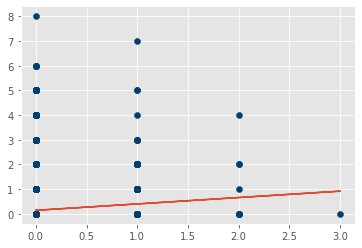

In [53]:
regression_line = [(m*x)+b for x in xs]
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)
    
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

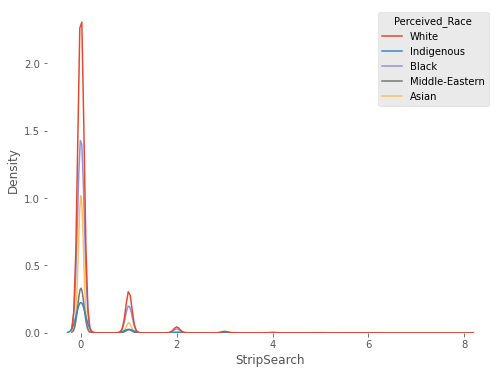

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
Perceived_Race,,,
White,0.383796,0.0,False
Indigenous,0.352334,0.0,False
Black,0.404653,0.0,False
Middle-Eastern,0.268159,0.0,False
Asian,0.285253,0.0,False


In [54]:
import pingouin as pg

dv = 'StripSearch'
iv = 'Perceived_Race'


fig, ax = plt.subplots(figsize = (8, 6))
ax.grid(False)
ax.set_frame_on(False)

sns.kdeplot(data = sa, x = dv, hue = iv,
            fill = False, ax = ax)
plt.show()

pg.normality(sa, dv = dv, group = iv, method = 'shapiro')

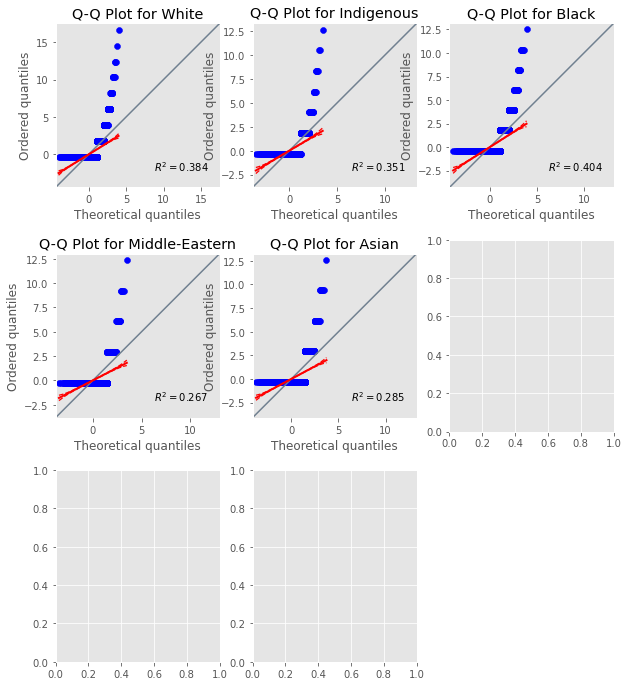

In [55]:
fig, axes = plt.subplots(3,3, figsize = (10, 12))
axes[2,2].set_axis_off()

categories = sa[iv].unique()
for ax, cat in zip(axes.flatten(), categories):
    mask = sa[iv] == cat
    sample = sa.loc[mask, dv]
    pg.qqplot(sample, ax = ax)
    ax.set_title(f"Q-Q Plot for {cat}")
    ax.grid(False)
    ax.spines['bottom'].set_visible(False)

### Logistic Regression

In [56]:
#Prepare the dataframe for logistic regression 
categorical_features = ['Perceived_Race','Sex']
df2 = df[['Perceived_Race','Sex','Actions_at_arrest___Cooperative']]

In [57]:
#One-hot encode the categorical feature
df2_encoded = pd.get_dummies(df2, columns = categorical_features, drop_first = True)

In [58]:
#Modify the naming convention format
df2_encoded.rename(columns={
    'Perceived_Race_East/Southeast Asian': 'Race_East_Southeast_Asian',
    'Perceived_Race_Indigenous': 'Race_Indigenous',
    'Perceived_Race_Latino': 'Race_Latino',
    'Perceived_Race_Middle-Eastern': 'Race_Middle_Eastern',
    'Perceived_Race_South Asian': 'Race_South_Asian',
    'Perceived_Race_Unknown or Legacy': 'Race_Unknown_or_Legacy',
    'Perceived_Race_White': 'Race_White'
}, inplace=True)

In [59]:
#Splitting the data
x = df2_encoded.drop('Actions_at_arrest___Cooperative', axis = 1)
y = df2_encoded['Actions_at_arrest___Cooperative']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 123)

trainingdata = pd.concat([x_train, y_train], axis = 1)

# define the formula
formula = 'Actions_at_arrest___Cooperative ~ ' + ' + '.join(df2_encoded.columns.difference(['Actions_at_arrest___Cooperative']))


# create the logistic regression model
model = smf.logit(formula=formula, data=trainingdata)

# fit the logistic regression model
result = model.fit()

# print the results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.685625
         Iterations 5
                                  Logit Regression Results                                 
Dep. Variable:     Actions_at_arrest___Cooperative   No. Observations:                48939
Model:                                       Logit   Df Residuals:                    48929
Method:                                        MLE   Df Model:                            9
Date:                             Sun, 16 Apr 2023   Pseudo R-squ.:                0.002099
Time:                                     20:14:57   Log-Likelihood:                -33554.
converged:                                    True   LL-Null:                       -33624.
Covariance Type:                         nonrobust   LLR p-value:                 5.899e-26
                                coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [60]:
#Produce the covariance matrix
cov_matrix = result.cov_params()
cov_matrix

,Intercept,Race_East_Southeast_Asian,Race_Indigenous,Race_Latino,Race_Middle_Eastern,Race_South_Asian,Race_Unknown_or_Legacy,Race_White,Sex_M,Sex_U
Intercept,0.000686,-3.125042e-04,-0.000380,-0.000302,-0.000289,-0.000303,-0.000319,-0.000338,-4.485417e-04,-3.602510e-04
Race_East_Southeast_Asian,-0.000313,1.509922e-03,0.000313,0.000313,0.000313,0.000313,0.000313,0.000313,-7.766817e-07,-6.238002e-07
Race_Indigenous,-0.000380,3.130346e-04,0.003228,0.000311,0.000309,0.000311,0.000314,0.000318,8.006579e-05,6.430569e-05
Race_Latino,-0.000302,3.131694e-04,0.000311,0.003289,0.000314,0.000313,0.000313,0.000312,-1.357093e-05,-4.193629e-04
Race_Middle_Eastern,-0.000289,3.131913e-04,0.000309,0.000314,0.001974,0.000314,0.000313,0.000312,-2.877484e-05,-2.311082e-05
Race_South_Asian,-0.000303,3.131681e-04,0.000311,0.000313,0.000314,0.001805,0.000313,0.000312,-1.261428e-05,-1.013129e-05
Race_Unknown_or_Legacy,-0.000319,3.131403e-04,0.000314,0.000313,0.000313,0.000313,0.001385,0.000314,6.655758e-06,-3.867562e-04
Race_White,-0.000338,3.131075e-04,0.000318,0.000312,0.000312,0.000312,0.000314,0.000509,2.942655e-05,-7.316520e-05
Sex_M,-0.000449,-7.766817e-07,0.000080,-0.000014,-0.000029,-0.000013,0.000007,0.000029,5.395513e-04,4.333464e-04
Sex_U,-0.000360,-6.238002e-07,0.000064,-0.000419,-0.000023,-0.000010,-0.000387,-0.000073,4.333464e-04,6.680837e-01


In [61]:
#Produce table from result
data = {
    "Variable": ["Intercept", "Race_East_Southeast_Asian", "Race_Indigenous", "Race_Latino", "Race_Middle_Eastern", "Race_South_Asian", "Race_Unknown_or_Legacy", "Race_White", "Sex_M", "Sex_U"],
    "coef": [-0.3794, 0.3513, -0.0592, 0.3466, 0.1678, 0.1691, 0.0625, 0.0923, 0.0734, -0.4254],
    "std_err": [0.026, 0.039, 0.057, 0.057, 0.045, 0.042, 0.037, 0.023, 0.023, 0.708],
    "z_value": [-14.527, 9.066, -1.043, 6.079, 3.763, 3.999, 1.675, 4.094, 3.160, -0.601],
    "P>|z|": [0.000, 0.000, 0.297, 0.000, 0.000, 0.000, 0.094, 0.000, 0.002, 0.548],
    "95% CI Lower": [-0.431, 0.275, -0.170, 0.235, 0.080, 0.086, -0.011, 0.048, 0.028, -1.813],
    "95% CI Upper": [-0.328, 0.427, 0.052, 0.458, 0.255, 0.252, 0.136, 0.137, 0.119, 0.962],
}

df = pd.DataFrame(data)
print(tabulate(df, tablefmt="pipe", headers="keys", floatfmt=".3f", numalign="right"))


|    | Variable                  |   coef |   std_err |   z_value |   P>|z| |   95% CI Lower |   95% CI Upper |
|---:|:--------------------------|-------:|----------:|----------:|--------:|---------------:|---------------:|
|  0 | Intercept                 | -0.379 |     0.026 |   -14.527 |   0.000 |         -0.431 |         -0.328 |
|  1 | Race_East_Southeast_Asian |  0.351 |     0.039 |     9.066 |   0.000 |          0.275 |          0.427 |
|  2 | Race_Indigenous           | -0.059 |     0.057 |    -1.043 |   0.297 |         -0.170 |          0.052 |
|  3 | Race_Latino               |  0.347 |     0.057 |     6.079 |   0.000 |          0.235 |          0.458 |
|  4 | Race_Middle_Eastern       |  0.168 |     0.045 |     3.763 |   0.000 |          0.080 |          0.255 |
|  5 | Race_South_Asian          |  0.169 |     0.042 |     3.999 |   0.000 |          0.086 |          0.252 |
|  6 | Race_Unknown_or_Legacy    |  0.062 |     0.037 |     1.675 |   0.094 |         -0.011 |          

Race_East_Southeast_Asian:
  Log-odds: -0.028100000000000014
  Probability: 0.49297546221435723
  Standard error: 0.026115129714401192
  Prediction interval: (0.4417898079741309, 0.5441611164545835)

Race_Indigenous:
  Log-odds: -0.4386
  Probability: 0.39207461174189456
  Standard error: 0.0387556447501522
  Prediction interval: (0.31611354803159625, 0.4680356754521929)

Race_Latino:
  Log-odds: -0.032799999999999996
  Probability: 0.49180073507825073
  Standard error: 0.056762663785273504
  Prediction interval: (0.38054591405911464, 0.6030555560973868)

Race_Middle_Eastern:
  Log-odds: -0.2116
  Probability: 0.44729650140580896
  Standard error: 0.05701754116059373
  Prediction interval: (0.3355421207310453, 0.5590508820805726)

Race_South_Asian:
  Log-odds: -0.21030000000000001
  Probability: 0.44761791242548116
  Standard error: 0.044586993619215906
  Prediction interval: (0.360227404931818, 0.5350084199191443)

Race_Unknown_or_Legacy:
  Log-odds: -0.3169
  Probability: 0.421431426

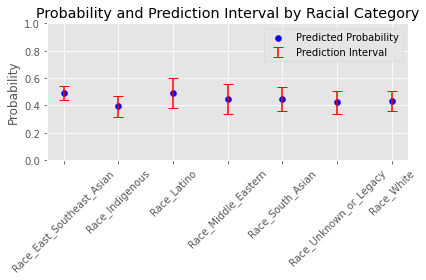

In [62]:
# Logistic regression coefficients
coef = {
    "Intercept": -0.3794,
    "Race_East_Southeast_Asian": 0.3513,
    "Race_Indigenous": -0.0592,
    "Race_Latino": 0.3466,
    "Race_Middle_Eastern": 0.1678,
    "Race_South_Asian": 0.1691,
    "Race_Unknown_or_Legacy": 0.0625,
    "Race_White": 0.0923
}

# Covariance matrix
cov_matrix = np.array([
    [0.000682, -0.000308, -0.000377, -0.000301, -0.000287, -0.000296, -0.000317, -0.000334],
    [-0.000308, 0.001502, 0.000311, 0.000312, 0.000312, 0.000312, 0.000312, 0.000312],
    [-0.000377, 0.000311, 0.003222, 0.000310, 0.000308, 0.000309, 0.000313, 0.000316],
    [-0.000301, 0.000312, 0.000310, 0.003251, 0.000313, 0.000312, 0.000312, 0.000311],
    [-0.000287, 0.000312, 0.000308, 0.000313, 0.001988, 0.000313, 0.000312, 0.000311],
    [-0.000296, 0.000312, 0.000309, 0.000312, 0.000313, 0.001788, 0.000312, 0.000311],
    [-0.000317, 0.000312, 0.000313, 0.000312, 0.000312, 0.000312, 0.001392, 0.000312],
    [-0.000334, 0.000312, 0.000316, 0.000311, 0.000311, 0.000311, 0.000312, 0.000509]
])

# Calculate the log-odds, predicted probability, standard error, and prediction interval for each racial category
z_score = 1.96
probs = []
lower_bounds = []
upper_bounds = []
racial_categories = list(coef.keys())[1:]

for race in racial_categories:
    log_odds = coef["Intercept"] + coef[race]
    probability = np.exp(log_odds) / (1 + np.exp(log_odds))
    std_error = np.sqrt(cov_matrix[racial_categories.index(race), racial_categories.index(race)])
    lower_bound = probability - (z_score * std_error)
    upper_bound = probability + (z_score * std_error)
    
    probs.append(probability)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)
    
    print(f"{race}:")
    print(f"  Log-odds: {log_odds}")
    print(f"  Probability: {probability}")
    print(f"  Standard error: {std_error}")
    print(f"  Prediction interval: ({lower_bound}, {upper_bound})\n")

# Create the scatter plot
x = np.arange(len(racial_categories))
fig, ax = plt.subplots()

ax.scatter(x, probs, label='Predicted Probability', color='b')
ax.errorbar(x, probs, yerr=[(upper_bounds[i] - lower_bounds[i]) / 2 for i in range(len(upper_bounds))], linestyle='', label='Prediction Interval', color='r', capsize=5)

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(racial_categories, rotation=45)
ax.set_ylim(0, 1)
ax.set_ylabel('Probability')
ax.set_title('Probability and Prediction Interval by Racial Category')
ax.legend(loc='best')

# Display the plot
plt.tight_layout()
plt.show()
